<a href="https://colab.research.google.com/github/rahul-727/Computer-vision-lab-work/blob/main/2348544_CV_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Loading the image and reading in grayscale

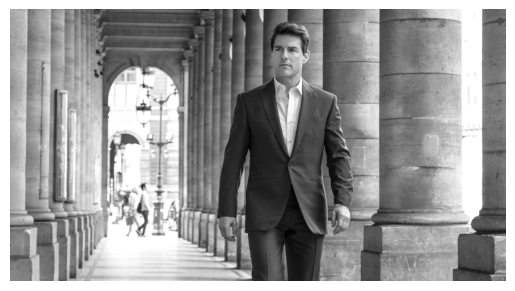

In [ ]:
image_path = '/content/wallpaperflare.com_wallpaper (5).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Average Filter

Built-in

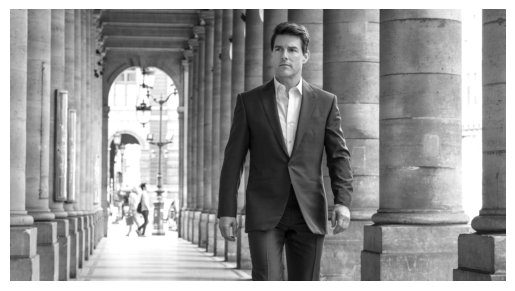

In [ ]:
average_filtered = cv2.blur(image, (5,5))
plt.imshow(average_filtered, cmap='gray')
plt.axis('off')
plt.show()

User-defined

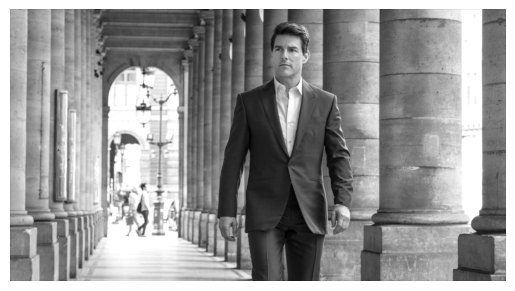

In [ ]:
def apply_filter(image, kernel):
    d, m, n = image.ndim, kernel.shape[0], kernel.shape[1]
    if d > 2:
        print("This function only handles single-channel images")
        return None
    padded_image = np.pad(image, pad_width=((m//2, m//2), (n//2, n//2)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(padded_image[i:i+m, j:j+n] * kernel)
    return output

average_kernel = np.ones((5, 5), np.float32) / 25
average_filtered_custom = apply_filter(image, average_kernel)

plt.imshow(average_filtered_custom, cmap='gray')
plt.axis('off')
plt.show()


# Gaussian Blur

Built-in

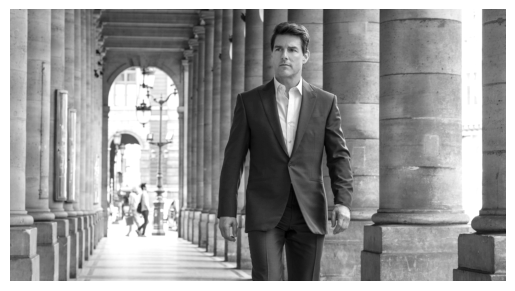

In [ ]:
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.show()

User-defined Function


For a custom Gaussian blur, you'd typically need to generate a Gaussian kernel. the approach would involve creating a 2D Gaussian function.
```



# Sharpening Filter (Laplacian)

Built-in

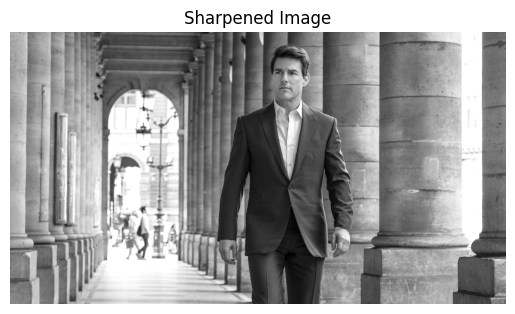

In [ ]:
image_float = np.float32(image) / 255.0
laplacian = cv2.Laplacian(image_float, cv2.CV_32F)
sharpened_float = cv2.subtract(image_float, laplacian)
sharpened = np.clip(sharpened_float * 255.0, 0, 255).astype('uint8')

plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()


User-defined Function
For Laplacian sharpening, you can define a Laplacian kernel and then apply it.

In [ ]:
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacian_custom = apply_filter(image, laplacian_kernel)
sharpened_custom = cv2.subtract(image, laplacian_custom)
sharpened_custom = np.clip(sharpened_custom, 0, 255).astype(np.uint8)


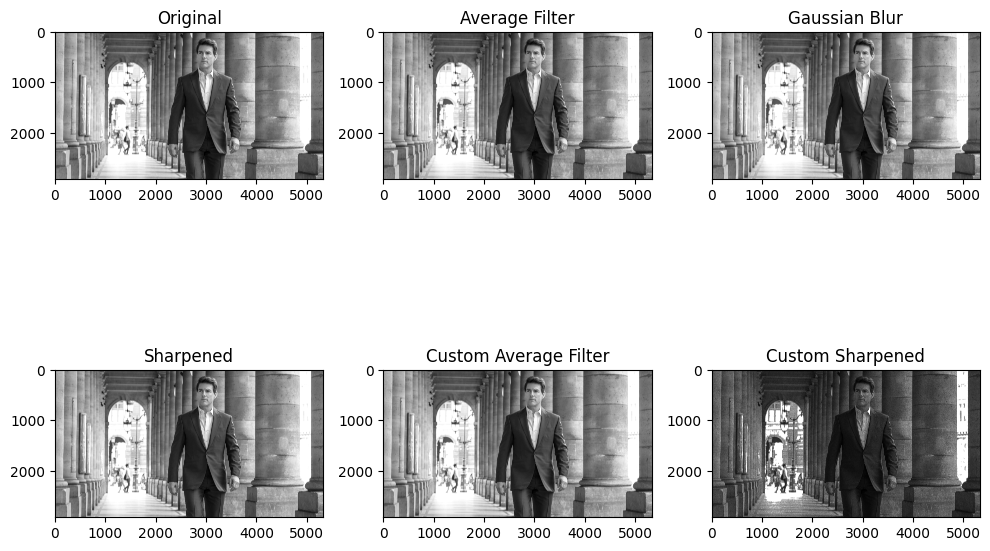

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(2,3,1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(2,3,2), plt.imshow(average_filtered, cmap='gray'), plt.title('Average Filter')
plt.subplot(2,3,3), plt.imshow(gaussian_blur, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(2,3,4), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened')
plt.subplot(2,3,5), plt.imshow(average_filtered_custom, cmap='gray'), plt.title('Custom Average Filter')
plt.subplot(2,3,6), plt.imshow(sharpened_custom, cmap='gray'), plt.title('Custom Sharpened')
plt.tight_layout()
plt.show()
